## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error

In [3]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

## Generate Dataset

In [4]:
X_train = np.linspace(-1, 1, 20)
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  , 
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475, 
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,  
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [5]:
X_test = np.linspace(-1, 1, 20)
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,  
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

In [6]:
X_train.shape

(20,)

### Visualize dataset

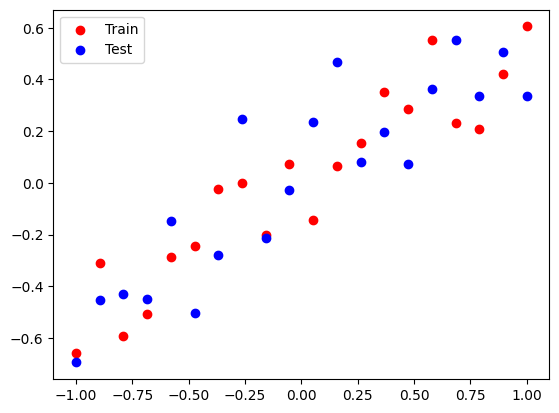

In [7]:
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.legend()
plt.show()

# Regression without Dropouts

In [8]:
## Model initialization, Input layer
model = Sequential()

## Hidden layers
model.add(Dense(128, activation='relu', input_dim=1))
model.add(Dense(128, activation='relu'))

## Output layer
model.add(Dense(1, activation='linear'))

c:\Users\7200\AppData\Local\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,897 (66.00 KB)

 Trainable params: 16,897 (66.00 KB)

 Non-trainable params: 0 (0.00 B)

## Compile and train the model

In [10]:
adam = Adam(learning_rate=0.01)
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test))
history = history.history

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 735ms/step - loss: 0.1490 - mse: 0.1490 - val_loss: 0.1385 - val_mse: 0.1385
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.1258 - mse: 0.1258 - val_loss: 0.1184 - val_mse: 0.1184
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.1059 - mse: 0.1059 - val_loss: 0.1015 - val_mse: 0.1015
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0891 - mse: 0.0891 - val_loss: 0.0869 - val_mse: 0.0869
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0745 - mse: 0.0745 - val_loss: 0.0747 - val_mse: 0.0747
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0623 - mse: 0.0623 - val_loss: 0.0646 - val_mse: 0.0646
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0522 - mse: 0.0522 - val_loss: 0.0561 - val_mse: 0.0561
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0436 - mse: 0.0436 - val_loss: 0.0490 - val_mse: 0.0490
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0366 - mse:

## Plot Graph

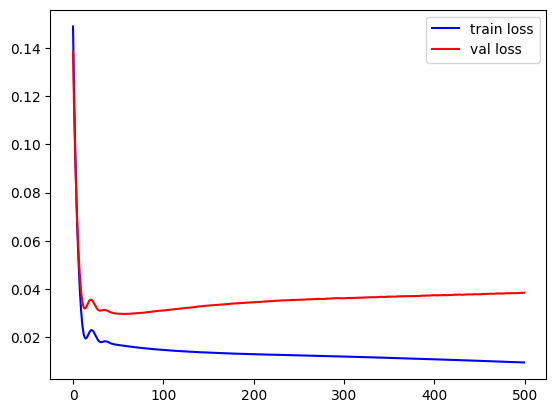

In [11]:
plt.plot(history['loss'], c='b', label='train loss')
plt.plot(history['val_loss'], c='r', label='val loss')
plt.legend()
plt.show()

## Plot Regression Boundary

In [12]:
y_pred_without_dropput = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


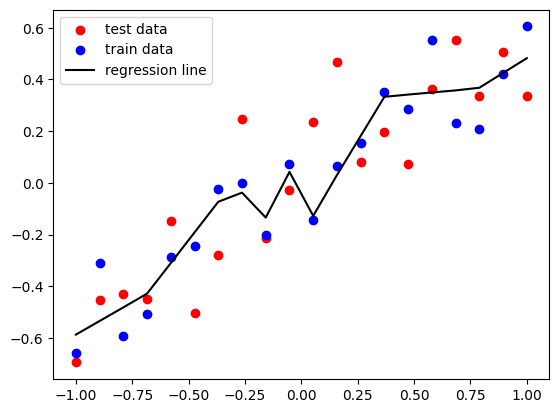

In [13]:
plt.scatter(X_test, y_test, color='red', label='test data')
plt.scatter(X_train, y_train, color='blue', label='train data')
plt.plot(X_test, y_pred_without_dropput, color='black', label='regression line')
plt.legend()
plt.show()

# Regression With Dropouts

In [14]:
## Model initialization, Input layer
model_2 = Sequential()

## Hidden layers
model_2.add(Dense(128, activation='relu', input_dim=1))
model_2.add(Dropout(0.5))
model_2.add(Dense(128, activation='relu'))
model_2.add(Dropout(0.5))

## Output layer
model_2.add(Dense(1, activation='linear'))

## Compile and Train the model

In [15]:
adam = Adam(learning_rate=0.01)
model_2.compile(loss='mse', optimizer='adam', metrics=['mse'])
history_2 = model_2.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test))
history_2 = history_2.history

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.1222 - mse: 0.1222 - val_loss: 0.1381 - val_mse: 0.1381
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.1486 - mse: 0.1486 - val_loss: 0.1182 - val_mse: 0.1182
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0992 - mse: 0.0992 - val_loss: 0.1005 - val_mse: 0.1005
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0934 - mse: 0.0934 - val_loss: 0.0850 - val_mse: 0.0850
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.1138 - mse: 0.1138 - val_loss: 0.0721 - val_mse: 0.0721
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.0762 - mse: 0.0762 - val_loss: 0.0612 - val_mse: 0.0612
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0451 - mse: 0.0451 - val_loss: 0.0523 - val_mse: 0.0523
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0516 - mse: 0.0516 - val_loss: 0.0451 - val_mse: 0.0451
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0522 - mse: 0.

## Plot graph

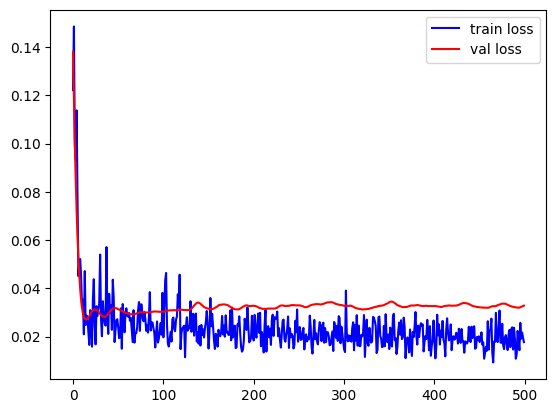

In [16]:
plt.plot(history_2['loss'], c='b', label='train loss')
plt.plot(history_2['val_loss'], c='r', label='val loss')
plt.legend()
plt.show()

## Plot Decision Boundary

In [17]:
y_pred_with_dropouts = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


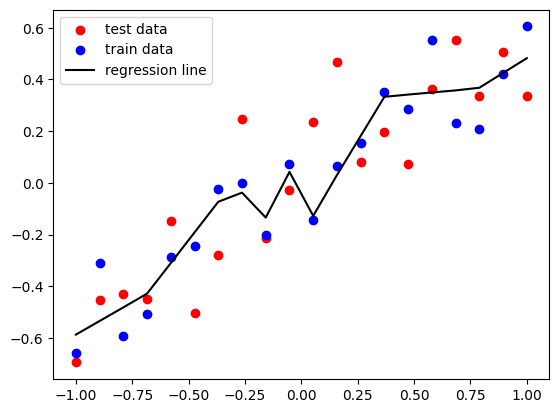

In [18]:
plt.scatter(X_test, y_test, color='red', label='test data')
plt.scatter(X_train, y_train, color='blue', label='train data')
plt.plot(X_test, y_pred_with_dropouts, color='black', label='regression line')
plt.legend()
plt.show()

# Compare

In [21]:
print(f"MSE without dropouts: {mean_squared_error(X_test, y_pred_without_dropput)}")
print(f"MSE with dropouts: {mean_squared_error(X_test, y_pred_with_dropouts)}")

MSE without dropouts: 0.08309415757219626
MSE with dropouts: 0.08309415757219626
